<a href="https://colab.research.google.com/github/vipulSharma18/Push-Recovery-using-Deep-Q-Learning/blob/main/dataset_generation/2_link_manipulator_with_point_masses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from math import cos, sin, radians

# The Torque Calculation for the following manipulator with DOF 2 and point masses at ends is done:

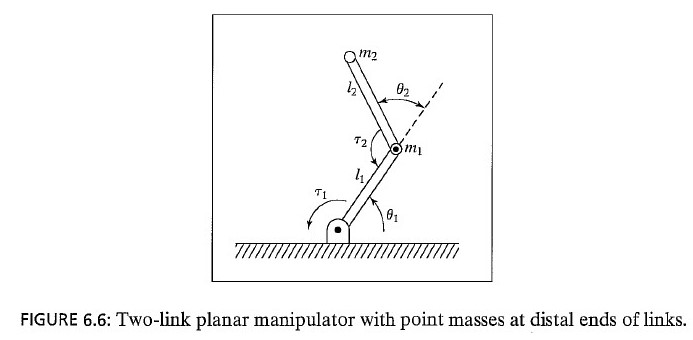

In [ ]:
#inputs:
#It has been observed that the various body parts account for the following(constants multiplied to array) % of total lengths and total weigths
#The weight and heights of the people are present in the numpy arrays
# we can create (height, weight) pairs by considering the BMIs of normal, overweight and obese people
M1 = 0.0457*np.array([70]*5 +  [60]*5)
M2 = 0.1447*np.array([70]*5 +  [60]*5)
L1 = 0.252*np.array([1.73]*5+ [1.57]*5)
L2 = 0.2405*np.array([1.73]*5 + [1.57]*5)


In [ ]:
g = 9.8

> From here on out, whenever we say velocity or acceleration, we mean angular velocity and angular acceleration

In [ ]:
def T1(m1, l1, m2, l2, theta1, theta2, velocity1, velocity2, acceleration1, acceleration2):
  return (m2*l2*l2*(acceleration1 + acceleration2) + m2*l1*l2*cos(radians(theta2))*(2*acceleration2 + acceleration1) \
          + (m1+m2)*l1*l1*acceleration1 - m2*l1*l2*sin(radians(theta2))*velocity2*velocity2 \
          - 2*m2*l1*l2*sin(radians(theta2))*velocity1*velocity2 + m2*l2*g*cos(radians(theta1+theta2)) \
          + (m1+m2)*l1*g*cos(radians(theta1)))

def T2(m1, l1, m2, l2, theta1, theta2, velocity1, velocity2, acceleration1, acceleration2):
  return (m2*l1*l2*cos(radians(theta2))*acceleration1 + m2*l1*l2*sin(radians(theta2))*velocity1*velocity1 \
          +m2*l2*g*cos(radians(theta1+theta2)) +m2*l2*l2*(acceleration1+acceleration2) )


In [ ]:
np.random.seed(43)
THETA1 = 85*np.random.random(10)+5
THETA2 = 85*np.random.random(10)+5
VELOCITY1 = 2*np.random.random(10)+1
VELOCITY2 = 2*np.random.random(10)+1
ACCELERATION1 = 4*np.random.random(10)+1
ACCELERATION2 = 4*np.random.random(10)+1

In [ ]:
d = {'Mass1': M1, 'Length1': L1,'Mass2': M2,'Length2': L2,'Theta1': THETA1,'Theta2': THETA2,\
        'Velocity1': VELOCITY1, 'Velocity2': VELOCITY2, 'Acceleration1': ACCELERATION1, 'Acceleration2': ACCELERATION2}
dataset = pd.DataFrame(data = d)

In [ ]:
dataset

,Mass1,Length1,Mass2,Length2,Theta1,Theta2,Velocity1,Velocity2,Acceleration1,Acceleration2
0,3.199,0.43596,10.129,0.416065,14.779638,38.570752,2.697878,1.010259,4.812161,3.942908
1,3.199,0.43596,10.129,0.416065,56.770656,73.174005,2.942930,2.086405,2.647812,2.780246
2,3.199,0.43596,10.129,0.416065,16.338232,26.625796,1.770754,1.951193,4.460068,3.242653
3,3.199,0.43596,10.129,0.416065,25.450118,9.835220,2.908976,2.272747,3.688709,2.645022
4,3.199,0.43596,10.129,0.416065,32.806820,78.665134,1.891517,2.956408,3.515143,3.907952
5,2.742,0.39564,8.682,0.377585,78.026687,23.787465,2.339449,2.817326,2.102235,2.596788
6,2.742,0.39564,8.682,0.377585,61.617668,39.424103,1.165000,2.820306,4.586989,3.680581
7,2.742,0.39564,8.682,0.377585,50.998788,31.868200,2.794197,2.050511,1.827565,3.818862
8,2.742,0.39564,8.682,0.377585,7.466175,11.516329,1.596007,1.208038,2.617621,3.438239
9,2.742,0.39564,8.682,0.377585,67.368605,76.674099,1.524610,1.361829,4.974290,3.160138


In [ ]:
dataset.columns

Index(['Mass1', 'Length1', 'Mass2', 'Length2', 'Theta1', 'Theta2', 'Velocity1',
       'Velocity2', 'Acceleration1', 'Acceleration2'],
      dtype='object')

In [ ]:
dataset['T1'] = np.vectorize(T1)(dataset['Mass1'], dataset['Length1'], dataset['Mass2'], dataset['Length2'], dataset['Theta1'],dataset['Theta2'],\
                                 dataset['Velocity1'],dataset['Velocity2'],dataset['Acceleration1'],dataset['Acceleration2'])


In [ ]:
dataset

,Mass1,Length1,Mass2,Length2,Theta1,Theta2,Velocity1,Velocity2,Acceleration1,Acceleration2,T1
0,3.199,0.43596,10.129,0.416065,14.779638,38.570752,2.697878,1.010259,4.812161,3.942908,118.079573
1,3.199,0.43596,10.129,0.416065,56.770656,73.174005,2.942930,2.086405,2.647812,2.780246,-3.974048
2,3.199,0.43596,10.129,0.416065,16.338232,26.625796,1.770754,1.951193,4.460068,3.242653,118.822676
3,3.199,0.43596,10.129,0.416065,25.450118,9.835220,2.908976,2.272747,3.688709,2.645022,116.062743
4,3.199,0.43596,10.129,0.416065,32.806820,78.665134,1.891517,2.956408,3.515143,3.907952,22.861631
5,2.742,0.39564,8.682,0.377585,78.026687,23.787465,2.339449,2.817326,2.102235,2.596788,9.797754
6,2.742,0.39564,8.682,0.377585,61.617668,39.424103,1.165000,2.820306,4.586989,3.680581,33.344951
7,2.742,0.39564,8.682,0.377585,50.998788,31.868200,2.794197,2.050511,1.827565,3.818862,41.822172
8,2.742,0.39564,8.682,0.377585,7.466175,11.516329,1.596007,1.208038,2.617621,3.438239,97.163820
9,2.742,0.39564,8.682,0.377585,67.368605,76.674099,1.524610,1.361829,4.974290,3.160138,5.798508


In [ ]:
dataset['T2'] = np.vectorize(T2)(dataset['Mass1'], dataset['Length1'], dataset['Mass2'], dataset['Length2'], dataset['Theta1'],dataset['Theta2'],\
                                 dataset['Velocity1'],dataset['Velocity2'],dataset['Acceleration1'],dataset['Acceleration2'])


In [ ]:
dataset

,Mass1,Length1,Mass2,Length2,Theta1,Theta2,Velocity1,Velocity2,Acceleration1,Acceleration2,T1,T2
0,3.199,0.43596,10.129,0.416065,14.779638,38.570752,2.697878,1.010259,4.812161,3.942908,118.079573,55.254486
1,3.199,0.43596,10.129,0.416065,56.770656,73.174005,2.942930,2.086405,2.647812,2.780246,-3.974048,-0.359761
2,3.199,0.43596,10.129,0.416065,16.338232,26.625796,1.770754,1.951193,4.460068,3.242653,118.822676,53.636248
3,3.199,0.43596,10.129,0.416065,25.450118,9.835220,2.908976,2.272747,3.688709,2.645022,116.062743,54.151936
4,3.199,0.43596,10.129,0.416065,32.806820,78.665134,1.891517,2.956408,3.515143,3.907952,22.861631,5.612659
5,2.742,0.39564,8.682,0.377585,78.026687,23.787465,2.339449,2.817326,2.102235,2.596788,9.797754,4.597021
6,2.742,0.39564,8.682,0.377585,61.617668,39.424103,1.165000,2.820306,4.586989,3.680581,33.344951,9.794080
7,2.742,0.39564,8.682,0.377585,50.998788,31.868200,2.794197,2.050511,1.827565,3.818862,41.822172,18.337714
8,2.742,0.39564,8.682,0.377585,7.466175,11.516329,1.596007,1.208038,2.617621,3.438239,97.163820,41.861365
9,2.742,0.39564,8.682,0.377585,67.368605,76.674099,1.524610,1.361829,4.974290,3.160138,5.798508,-11.515413


In [ ]:
np.array(dataset.iloc[0])

array([  3.199     ,   0.43596   ,  10.129     ,   0.416065  ,
        14.77963814,  38.57075157,   2.6978783 ,   1.0102591 ,
         4.81216088,   3.94290833, 118.07957332,  55.25448553])

## Testing of the T1 and T2 functions on some special cases

In [65]:
#assume m1=m2=5 Kg, l1=l2=1m
print(T1(5,1,5,1,0,90,0,5,0,0), T2(5,1,5,1,0,90,0,5,0,0))

-27.0 3.0003846579110155e-15
